# Определение перспективного тарифа для телеком компании

Задача: сделать предварительный анализ тарифов на небольшой выборке клиентов и сделать вывод — какой тариф лучше.\
Исходные данные: 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.\
«Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.


##  Изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st


### Чтение данных

Прочитаем файл с информацией о звонках и посмотрим 10 случайных строк и общую информацию

In [2]:
calls = pd.read_csv('Ya_data/telecom/calls.csv')
calls.sample(10, random_state=1)

,id,call_date,duration,user_id
26953,1066_374,2018-08-26,0.00,1066
66122,1168_1273,2018-03-28,16.05,1168
67325,1171_350,2018-09-14,6.23,1171
74643,1186_465,2018-09-02,0.79,1186
192311,1472_124,2018-05-04,5.94,1472
47375,1118_664,2018-10-24,13.41,1118
91143,1227_563,2018-08-03,15.15,1227
3818,1010_67,2018-08-16,14.29,1010
182822,1454_574,2018-09-23,9.98,1454
187346,1463_0,2018-12-05,10.63,1463


In [3]:
calls.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Имеем 4 столбца. \
id — уникальный номер звонка\
call_date — дата звонка\
duration — длительность звонка в минутах\
user_id — идентификатор пользователя, сделавшего звонок\

Пропусков нет. В столбце call_date нужно поменять тип данных.
Некоторые разговоры имеют нулевую длительность.\
Кроме того нужно округлить секунды до целых минут согласно условиям тарификации.

Прочитаем файл с информацией об интернет-сессиях и посмотрим 10 случайных строк и общую информацию

In [4]:
internet = pd.read_csv('Ya_data/telecom/internet.csv')
internet.sample(10, random_state=1)

,Unnamed: 0,id,mb_used,session_date,user_id
35745,35745,1124_125,122.45,2018-12-03,1124
18383,18383,1064_102,320.60,2018-12-19,1064
59774,59774,1203_22,605.96,2018-06-17,1203
56317,56317,1188_123,781.73,2018-05-08,1188
52231,52231,1176_386,150.98,2018-08-20,1176
20276,20276,1068_26,389.65,2018-12-04,1068
82748,82748,1281_64,841.89,2018-11-07,1281
129266,129266,1431_300,461.23,2018-11-26,1431
46783,46783,1160_75,0.00,2018-08-15,1160
48492,48492,1168_260,336.06,2018-07-28,1168


In [5]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Имеем 5 столбцов. \
Unnamed: 0 - дублирующий индексы столбец (можно удалить)\
id — уникальный номер сессии\
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)\
session_date — дата интернет-сессии\
user_id — идентификатор пользователя\
Пропусков нет. В столбце session_date нужно поменять тип данных. 

Прочитаем файл с информацией о сообщениях и посмотрим 10 случайных строк и общую информацию

In [6]:
messages = pd.read_csv('Ya_data/telecom/messages.csv')
messages.sample(10, random_state=1)

,id,message_date,user_id
45696,1197_26,2018-12-31,1197
66091,1282_523,2018-11-30,1282
18743,1082_184,2018-10-18,1082
33759,1146_557,2018-12-22,1146
11403,1048_49,2018-09-27,1048
97793,1401_125,2018-08-10,1401
406,1000_406,2018-12-29,1000
71393,1302_221,2018-10-23,1302
103004,1420_11,2018-12-12,1420
53795,1238_208,2018-10-08,1238


In [7]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Имеем 3 столбца\
id — уникальный номер сообщения\
message_date — дата сообщения\
user_id — идентификатор пользователя, отправившего сообщение\
Пропусков нет. В столбцеи message_date нужно поменять тип данных.

Прочитаем файл с информацией о тарифах и посмотрим содержимое и общую информацию

In [8]:
tariffs = pd.read_csv('Ya_data/telecom/tariffs.csv')
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Имеем 8 столбцов\
tariff_name — название тарифа\
rub_monthly_fee — ежемесячная абонентская плата в рублях\
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату\
messages_included — количество сообщений в месяц, включённых в абонентскую плату\
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)\
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)\
rub_per_message — стоимость отправки сообщения сверх тарифного пакета\
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)\
С данными все в порядке.

Прочитаем файл с информацией о пользователях и посмотрим 10 случайных строк и общую информацию

In [10]:
users = pd.read_csv('Ya_data/telecom/users.csv')
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Имеем 8 столбцов\
user_id — уникальный идентификатор пользователя\
first_name — имя пользователя\
last_name — фамилия пользователя\
age — возраст пользователя (годы)\
reg_date — дата подключения тарифа (день, месяц, год)\
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)\
city — город проживания пользователя\
tariff — название тарифного плана\
Пропуски в churn_date можно заменить на последнее число года.

### Вывод

Прочитали файлы с данными. Посмотрели содержание и типы данных. Пропуски замениять нигде не нужно. Во всех файлах дата в неправильном формате. Столбцы id имеют двойной числовой формат. Что с этим делать не понятно. Вряд ли эта информация понадобится для этого исследования.  Обнаружен лишний столбец в данных об интернет-сессиях. Длительность звонков нужно округлить до минут в большую сторону. 

## Подготовка данных

### Приведем данные к нужным типам

In [12]:
#В internet удалим лишний столбец.
internet = internet.drop(['Unnamed: 0'], axis=1)

# В задании указано что данные за 18 год, поэтому заполним пропуски в датах прекращения пользования последней датой этого года 
users['churn_date'] = users['churn_date'].fillna('2018-12-31')

#В calls округлим минуты в большую сторону.
calls['duration'] = np.ceil(calls['duration']).astype('int')

#Переведем дату из object в datetime64 в данных calls, internet, messages и users. 
#зададим столбцы для замены типа данных
date_type_param = [[calls,'call_date'],
                  [internet,'session_date'],
                  [messages,'message_date'],
                  [users, 'reg_date'],
                  [users, 'churn_date']]
#проделаем опервции в цикле и посмотрим результат
for param in date_type_param:
    param[0][param[1]] = pd.to_datetime(param[0][param[1]], format='%Y-%m-%d')
    param[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int32         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 5.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB
<class 'pandas.core.frame.

### Анализ нулевых значений в длительности звонков и интернет трафике

Длительность многих звонков — 0.0 минут. Построим гистрограмму чтобы оценить относительное колличество таких значений.

count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

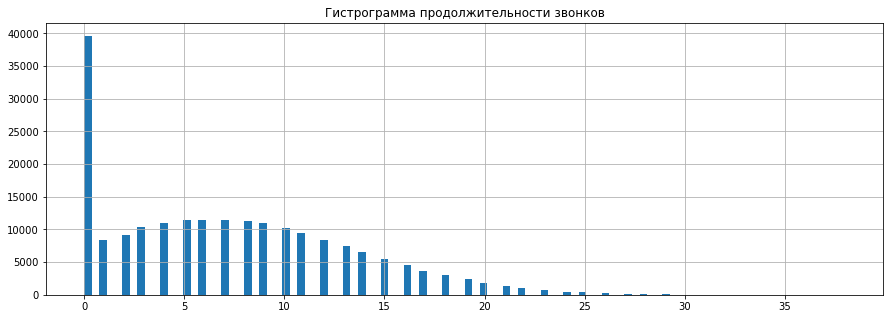

In [13]:
#calls.boxplot(column='duration')
calls['duration'].hist(bins=100, figsize=(15,5))
plt.title('Гистрограмма продолжительности звонков')
#plt.show()
calls['duration'].describe()

Посмотрим отношение 0-ых звонков к остальным звонкам для разных пользователей

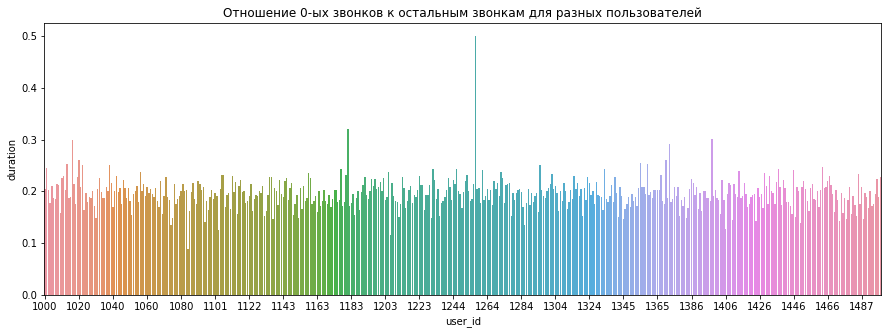

In [14]:
call_to_plot = (calls.query('duration == 0').groupby('user_id')['duration'].count() / 
                         calls.groupby('user_id')['duration'].count()).to_frame().reset_index()
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x=call_to_plot['user_id'], y = call_to_plot['duration'],ax=ax)

ax.set_xticks(range(0,calls['user_id'].nunique(),20))
ax.set_xticklabels(calls['user_id'].unique()[::20])
plt.title('Отношение 0-ых звонков к остальным звонкам для разных пользователей')
plt.show()


Из графика видно, что такие звонки составляют примерно 20% от общего колличества звонков для каждого абонента. Возможно это пропущенные звонки или ошибка системы округления 1й минуты или нетарифицируемый порог.

Объем трафика многих интерент сессий — 0.0 Мб. Построим гистрограмму чтобы оценить относительное колличество таких значений.

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

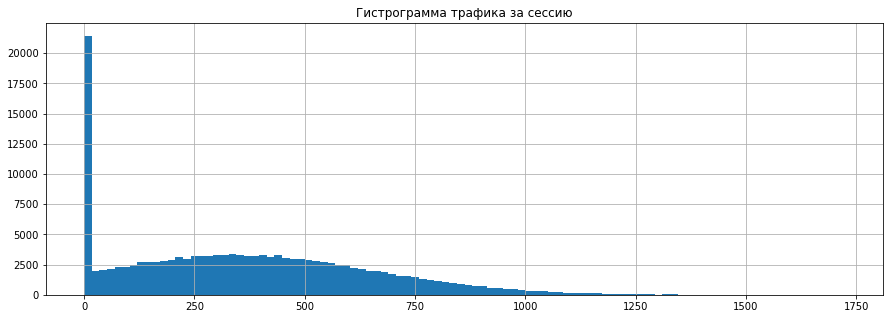

In [15]:
internet['mb_used'].hist(bins=100, figsize=(15,5))
plt.title('Гистрограмма трафика за сессию')
internet['mb_used'].describe()

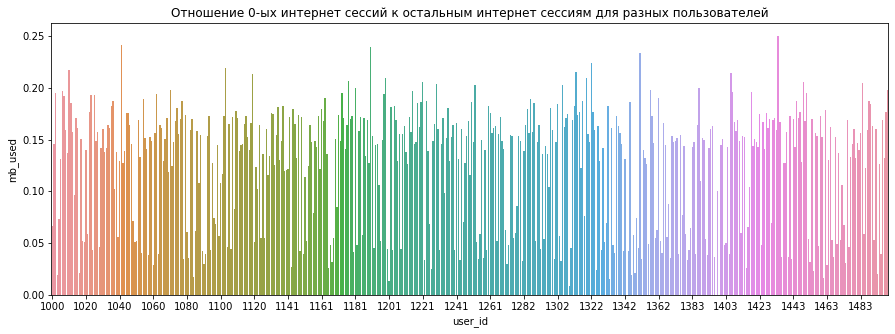

In [16]:
internet_to_plot = (internet.query('mb_used == 0').groupby('user_id')['mb_used'].count() / 
                        internet.groupby('user_id')['mb_used'].count()).to_frame().reset_index()
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x=internet_to_plot['user_id'], y = internet_to_plot['mb_used'],ax=ax)
ax.set_xticks(range(0,internet['user_id'].nunique(),20))
ax.set_xticklabels(internet['user_id'].unique()[::20])
plt.title('Отношение 0-ых интернет сессий к остальным интернет сессиям для разных пользователей')

plt.show()

Ситуация аналогичная звонкам. Примерно 15% всех интенет сессий нулевые. Возможно это нетарифицируемый порог.

Для calls, internet и messages выделим для каждой записи месяц из даты и сохраним в отдельный столбец

In [17]:
month_add_param = [[calls,'month','call_date'],
                  [internet,'month', 'session_date'],
                  [messages,'month','message_date']]
#выделим для каждой записи месяц из даты 
for param in month_add_param:
    param[0][param[1]] = pd.DatetimeIndex(param[0][param[2]]).month    

Проверим результат

In [18]:
calls.sample()

,id,call_date,duration,user_id,month
136884,1350_14,2018-09-30,14,1350,9


In [19]:
internet.sample()

,id,mb_used,session_date,user_id,month
11281,1039_192,488.24,2018-10-13,1039,10


In [20]:
messages.sample()

,id,message_date,user_id,month
74465,1315_46,2018-10-13,1315,10


### Расчеты месячного потребления услуг

Количество сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя

In [21]:
calls_user_month = calls.pivot_table(index = 'user_id', columns = 'month', values = 'duration', aggfunc = ['sum','count'])
calls_user_month

sum                                                                  \
month      1      2      3      4      5      6      7      8      9       10   
user_id                                                                         
1000      NaN    NaN    NaN    NaN  159.0  172.0  340.0  408.0  466.0   350.0   
1001      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
1002      NaN    NaN    NaN    NaN    NaN  117.0  214.0  289.0  206.0   212.0   
1003      NaN    NaN    NaN    NaN    NaN    NaN    NaN  380.0  961.0   855.0   
1004      NaN    NaN    NaN    NaN   35.0  171.0  135.0  137.0  117.0   145.0   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
1495      NaN    NaN    NaN    NaN    NaN    NaN    NaN   92.0  813.0  1030.0   
1496     48.0  594.0  557.0  521.0  484.0  555.0  582.0  527.0  486.0   450.0   
1497      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   490.0   
1498      NaN    NaN    NaN    NaN    NaN    NaN  175.0  400.0  471.0   247.0   
1499      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   70.0   449.0   

         ... count                                                            
month    ...    3     4     5     6     7     8      9      10     11     12  
user_id  ...                                                                  
1000     ...   NaN   NaN  22.0  43.0  47.0  52.0   58.0   57.0   43.0   46.0  
1001     ...   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN   59.0   63.0  
1002     ...   NaN   NaN   NaN  15.0  26.0  42.0   36.0   33.0   32.0   33.0  
1003     ...   NaN   NaN   NaN   NaN   NaN  55.0  134.0  108.0  115.0  108.0  
1004     ...   NaN   NaN   9.0  31.0  22.0  19.0   26.0   29.0   19.0   21.0  
...      ...   ...   ...   ...   ...   ...   ...    ...    ...    ...    ...  
1495     ...   NaN   NaN   NaN   NaN   NaN  17.0  112.0  152.0  129.0  155.0  
1496     ...  79.0  67.0  63.0  74.0  73.0  88.0   68.0   72.0   80.0   80.0  
1497     ...   NaN   NaN   NaN   NaN   NaN   NaN    NaN   66.0   64.0   71.0  
1498     ...   NaN   NaN   NaN   NaN  23.0  57.0   59.0   41.0    NaN    NaN  
1499     ...   NaN   NaN   NaN   NaN   NaN   NaN    9.0   68.0   74.0   69.0  

[492 rows x 24 columns]

Количество отправленных сообщений по месяцам для каждого пользователя

In [22]:
messages_user_month = messages.pivot_table(index = 'user_id', columns = 'month', values = 'id',  aggfunc = 'count')
messages_user_month

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1002,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0
1004,NaN,NaN,NaN,NaN,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0
1005,7.0,38.0,56.0,41.0,42.0,47.0,56.0,64.0,52.0,44.0,51.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,82.0,82.0,79.0,84.0
1496,9.0,45.0,46.0,49.0,40.0,35.0,42.0,41.0,29.0,35.0,46.0,51.0
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,14.0,17.0


Объем израсходованного интернет-трафика по месяцам для каждого пользователя в гигабайтах

In [23]:
# функция округления до гигабайт в большую сторону
def round_gigabyte(x):
    return np.ceil(x/1024)

In [24]:
internet_user_month = round_gigabyte(internet.pivot_table(index = 'user_id', columns = 'month', values = 'mb_used', aggfunc = 'sum'))
internet_user_month.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,3.0,23.0,14.0,14.0,15.0,15.0,15.0,10.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,14.0
1002,NaN,NaN,NaN,NaN,NaN,11.0,18.0,20.0,17.0,14.0,19.0,18.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,13.0,15.0,12.0,10.0
1004,NaN,NaN,NaN,NaN,14.0,18.0,22.0,28.0,15.0,19.0,16.0,18.0


### Помесячная выручка с каждого пользователя

In [25]:
# Зададим фильтры для разных тарифов
filter_smart = users.loc[users['tariff'] == 'smart']['user_id']
filter_ultra = users.loc[users['tariff'] == 'ultra']['user_id']

In [26]:
# Функция считает стоимость услуг сверх лимитов
def traf_user_monts_cost(traf_user_month, traf_type):
       
    if traf_type == 'mess':
        traf_included = tariffs['messages_included']
        rub_per_data = tariffs['rub_per_message']
        
    if traf_type == 'call':
        traf_included = tariffs['minutes_included']
        rub_per_data = tariffs['rub_per_minute']
         
    if traf_type == 'inter':
        traf_included = round_gigabyte(tariffs['mb_per_month_included'])
        rub_per_data = tariffs['rub_per_gb']
        
    #разделим пользователей по тарифам и посчитаем трафик сверх тарифа 
    traf_smart_rem = traf_user_month[traf_user_month.index.isin(filter_smart)] - traf_included[0]
    traf_ultra_rem = traf_user_month[traf_user_month.index.isin(filter_ultra)] - traf_included[1]
    #посчитаем месячную стоимость трафика сверх тарифа
    traf_smart_cost = traf_smart_rem.where(traf_smart_rem > 0) * rub_per_data[0]
    traf_ultra_cost = traf_ultra_rem.where(traf_ultra_rem > 0) * rub_per_data[1]
    #соединим 2 тарифа в одну таблицу и заполним пропуски нулями
    traf_cost = traf_ultra_cost.append(traf_smart_cost).sort_values(by = 'user_id').fillna(0)
    return traf_cost


Помесячная стоимость сообщений

In [27]:
messages_user_month_billing = traf_user_monts_cost(messages_user_month, 'mess')
messages_user_month_billing

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,0.0,0.0,18.0,0.0,0.0,0.0,18.0,42.0,6.0,0.0,3.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Помесячная стоимость звонков

In [28]:
calls_user_month_billing = traf_user_monts_cost(calls_user_month['sum'], 'call')
calls_user_month_billing

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1496,0.0,282.0,171.0,63.0,0.0,165.0,246.0,81.0,0.0,0.0,486.0,54.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135.0


Помесячная стоимость интернета

In [29]:
internet_user_month_billing = traf_user_monts_cost(internet_user_month, 'inter')
internet_user_month_billing

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,600.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,600.0,1000.0,400.0,0.0,800.0,600.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,450.0,0.0,1350.0,0.0
1496,0.0,2600.0,2000.0,1200.0,1800.0,1000.0,1800.0,1600.0,2400.0,2600.0,2000.0,1200.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0


Сложим расходы за звонки, смс и интернет сверх тарифа

In [30]:
user_month_billing = internet_user_month_billing.add(messages_user_month_billing, fill_value = 0).add(calls_user_month_billing, fill_value = 0)
user_month_billing

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,600.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,600.0,1000.0,400.0,0.0,800.0,600.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,450.0,0.0,1350.0,0.0
1496,0.0,2882.0,2171.0,1263.0,1800.0,1165.0,2046.0,1681.0,2400.0,2600.0,2486.0,1257.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1135.0


Добавим абонентскую плату

In [31]:
#Добавим в users столбцы с месяцами подключения и откоючения.
users['reg_month'] = pd.DatetimeIndex(users['reg_date']).month
users['churn_month'] = pd.DatetimeIndex(users['churn_date']).month

In [32]:
#Добавим абонентскую плату для разных тарифов. Чтоб цикл не прерывался пропущенными данными добавим try except
for row in filter_smart: 
    try:
        user_month_billing.loc[row , users['reg_month'][row - 1000] : users['churn_month'][row - 1000]]  += tariffs['rub_monthly_fee'][0]
    except:
        print('Ой')

for row in filter_ultra: 
    try:
        user_month_billing.loc[row , users['reg_month'][row - 1000] : users['churn_month'][row - 1000]]  += tariffs['rub_monthly_fee'][1]
    except:
        print('Ой')


Ой
Ой


<div class="alert alert-success">
<h2>Комментарий ревьбюера</h2>

Вместо не очень информативного `print Ой` можно писать `pass` 
</div>

**Помесячная выручка с каждого пользователя**

In [33]:
user_month_billing

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1150.0,550.0
1002,0.0,0.0,0.0,0.0,0.0,550.0,1150.0,1550.0,950.0,550.0,1350.0,1150.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0
1004,0.0,0.0,0.0,0.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950.0,2400.0,1950.0,3300.0,1950.0
1496,550.0,3432.0,2721.0,1813.0,2350.0,1715.0,2596.0,2231.0,2950.0,3150.0,3036.0,1807.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,550.0,550.0,1685.0


### Вывод

Проанализировали входные данные. Нулевые звонки и интернет сесии оставили как есть. Они не должны повлиять на результаты исследования.\
Преобразовали даты в нужный формат.\
Посчитали для каждого пользователя:\
количество сделанных звонков и израсходованных минут разговора по месяцам;\
количество отправленных сообщений по месяцам;\
объем израсходованного интернет-трафика по месяцам;\
помесячную выручку с каждого пользователя.

По 2м клиентам данных потребления услуг не обнаружилось. Абоненскую плату им не начислили.

## Анализ данных

### Исследование поведения клиентов оператора на разных тарифах

In [34]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Cреднее количество, дисперсия и стандартное отклонение для минут разговоров в месяц для тарифа Смарт:
mean      419.062978
var     35844.189551
std       189.325618
dtype: float64
Cреднее количество, дисперсия и стандартное отклонение для минут разговоров в месяц для тарифа Ультра:
mean      545.451104
var     94203.418396
std       306.925754
dtype: float64


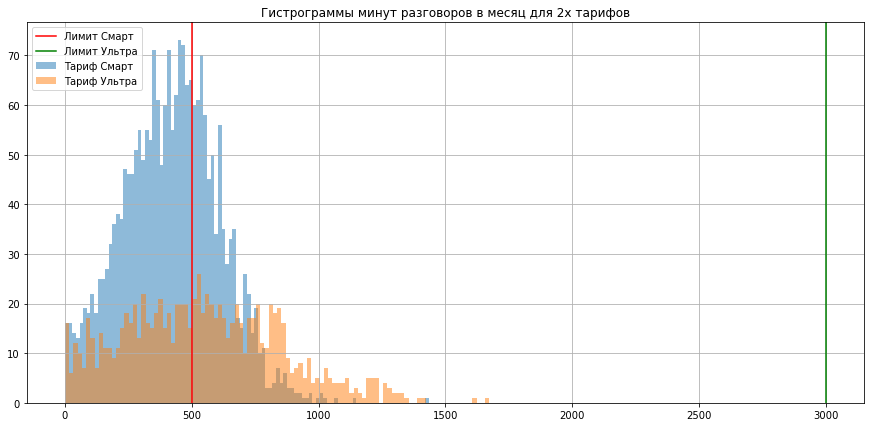

Cреднее количество, дисперсия и стандартное отклонение для сообщений в месяц для тарифа Смарт:
mean     38.716441
var     717.594201
std      26.787949
dtype: float64
Cреднее количество, дисперсия и стандартное отклонение для сообщений в месяц для тарифа Ультра:
mean      61.161006
var     2109.659183
std       45.931026
dtype: float64


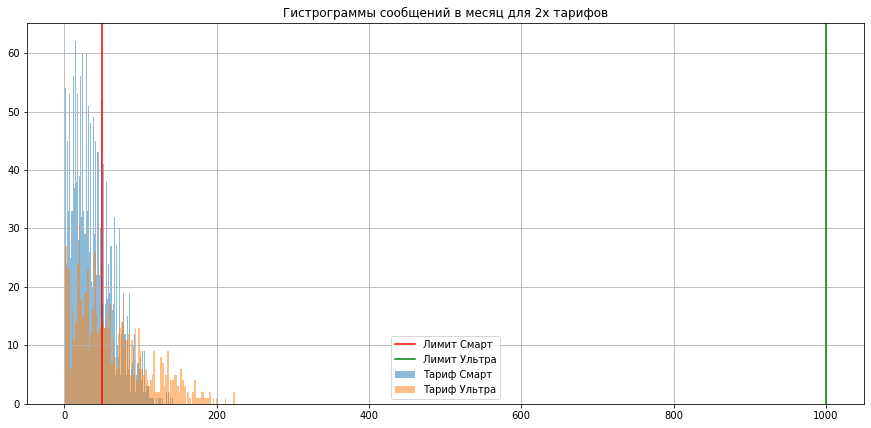

Cреднее количество, дисперсия и стандартное отклонение для объёма интернет-трафика в месяц для тарифа Смарт:
mean    16.336176
var     32.923756
std      5.737923
dtype: float64
Cреднее количество, дисперсия и стандартное отклонение для объёма интернет-трафика в месяц для тарифа Ультра:
mean    19.694359
var     94.146734
std      9.702924
dtype: float64


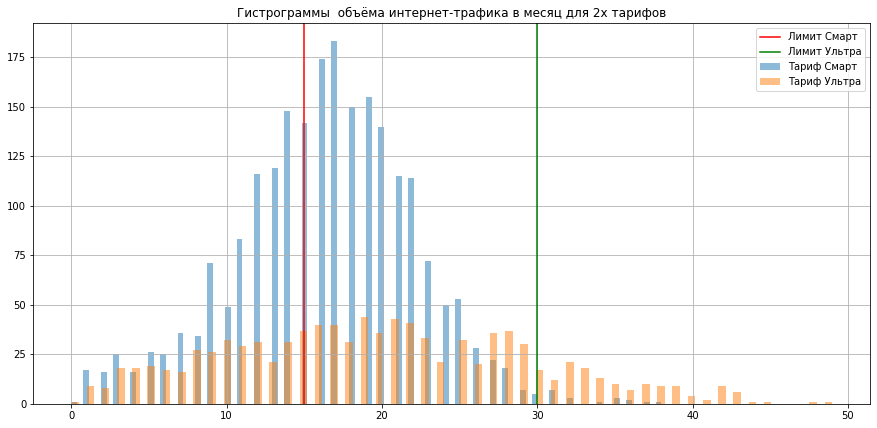

In [35]:
res_data = [[calls_user_month['sum'], 'звонки'], 
            [messages_user_month, 'сообщения'],
            [internet_user_month, 'интернет']]

for res_service, service_name in res_data:
    if service_name == 'звонки':
        title1 = 'Cреднее количество, дисперсия и стандартное отклонение для минут разговоров в месяц для тарифа Смарт:'
        title2 = 'Cреднее количество, дисперсия и стандартное отклонение для минут разговоров в месяц для тарифа Ультра:'
        title_graf = 'Гистрограммы минут разговоров в месяц для 2х тарифов'
        limit = tariffs['minutes_included']
    if service_name == 'сообщения':
        title1 = 'Cреднее количество, дисперсия и стандартное отклонение для сообщений в месяц для тарифа Смарт:'
        title2 = 'Cреднее количество, дисперсия и стандартное отклонение для сообщений в месяц для тарифа Ультра:'
        title_graf = 'Гистрограммы сообщений в месяц для 2х тарифов'
        limit = tariffs['messages_included']
    if service_name == 'интернет':
        title1 = 'Cреднее количество, дисперсия и стандартное отклонение для объёма интернет-трафика в месяц для тарифа Смарт:'
        title2 = 'Cреднее количество, дисперсия и стандартное отклонение для объёма интернет-трафика в месяц для тарифа Ультра:'
        title_graf = 'Гистрограммы  объёма интернет-трафика в месяц для 2х тарифов'
        limit = tariffs['mb_per_month_included'] / 1024
    print(title1)
    print(res_service[res_service.index.isin(filter_smart)].stack().agg(['mean','var','std']))
    print(title2)
    print(res_service[res_service.index.isin(filter_ultra)].stack().agg(['mean','var','std']))
    res_service[res_service.index.isin(filter_smart)].stack().hist(bins = 100, figsize=(15,7), alpha = 0.5)
    res_service[res_service.index.isin(filter_ultra)].stack().hist(bins = 100, figsize=(15,7), alpha = 0.5)
    plt.axvline(limit[0], color = 'red')
    plt.axvline(limit[1], color = 'green')
    plt.title(title_graf)
    plt.legend(['Лимит Смарт','Лимит Ультра' ,'Тариф Смарт', 'Тариф Ультра'])
    plt.show()
    


### Вывод

Среднее колиличество минут разговоров в месяц на тарифе Смарт/Ультра - 419/545 мин. Для тарифа Смарт чуть меньше, для тарифа Ультра чуть больше. \
Среднее колиличество сообщений 38/61.\
Средний интернет-трафик 16/19\
Дисперсия и стандартное отклонение на трифе Ультра везде больше.\
Можно сделать вывод, что пользователи тарифа Смарт стараются укладыватся в лимиты, но не у всех получается. Большим спросом пользуется интернет-трафик. На трифе Смарт его средннее больше чем лимит включенный в ежемесячную плату.

## Проверка гипотез

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

In [36]:
## Сформируем выборки для разных тарифов
sample_smart = user_month_billing[user_month_billing.index.isin(filter_smart)][user_month_billing > 0].stack()
sample_ultra = user_month_billing[user_month_billing.index.isin(filter_ultra)][user_month_billing > 0].stack()

Посчитаем среднюю выручку, ее дисперсию и стандартное отклонение для тарифа Смарт

In [37]:
sample_smart.agg(['mean','var','std'])

mean      1289.973531
var     669785.708006
std        818.404367
dtype: float64

Посчитаем среднюю выручку, ее дисперсию и стандартное отклонение для тарифа Ультра

In [38]:
sample_ultra.agg(['mean','var','std'])

mean      2070.152284
var     141516.745079
std        376.187114
dtype: float64

Построим гистрограммы для месячной выручки

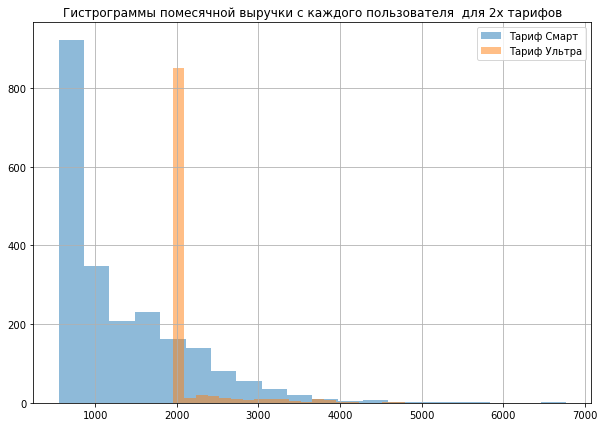

In [39]:
sample_smart.hist(bins = 20, figsize=(10,7), alpha = 0.5)
sample_ultra.hist(bins = 20, figsize=(10,7), alpha = 0.5)
plt.title('Гистрограммы помесячной выручки с каждого пользователя  для 2х тарифов')
plt.legend(['Тариф Смарт', 'Тариф Ультра'])
plt.show()

Сформулируем гипотезу: \
Cредняя выручка пользователей тарифов «Ультра» и «Смарт» равны - нулевая гипотеза Н0\
Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различны - альтернативная гипотеза Н1


In [40]:
alpha = 0.001 #Уровень значимости
results = st.ttest_ind(sample_smart, sample_ultra, equal_var = False) #Дисперсии сильно отличаются
results.pvalue

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [41]:
# Зададим фильтры пользователей из Москвы и регионов
filter_moskow = users.loc[users['city'] == 'Москва']['user_id']
filter_region = users.loc[users['city'] != 'Москва']['user_id']

In [42]:
# Сформируем выборки пользователей из Москвы и регионов
sample_moskow = user_month_billing[user_month_billing.index.isin(filter_moskow)][user_month_billing > 0].stack()
sample_region = user_month_billing[user_month_billing.index.isin(filter_region)][user_month_billing > 0].stack()

Посчитаем среднюю выручку, ее дисперсию и стандартное отклонение для Москвы

In [43]:
sample_moskow.agg(['mean','var','std'])

mean      1546.713584
var     565636.467012
std        752.088071
dtype: float64

Посчитаем среднюю выручку, ее дисперсию и стандартное отклонение для регионов

In [44]:
sample_region.agg(['mean','var','std'])

mean      1524.936227
var     654137.628522
std        808.787752
dtype: float64

Построим гистрограммы для месячной выручки

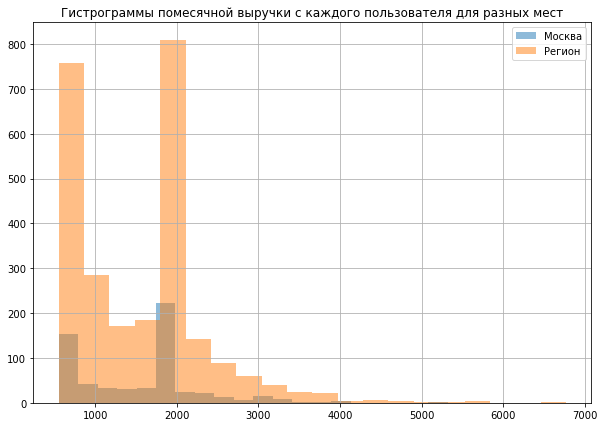

In [45]:
sample_moskow.hist(bins = 20, figsize=(10,7), alpha = 0.5)
sample_region.hist(bins = 20, figsize=(10,7), alpha = 0.5)
plt.title('Гистрограммы помесячной выручки с каждого пользователя для разных мест')
plt.legend(['Москва', 'Регион'])
plt.show()

Проверим гипотезу: \
Cредняя выручка пользователи из Москвы равна выручке пользователей из других регионов - Нулевая гипотеза Н0\
Cредняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов - Альтернативная гипотеза Н1

In [46]:
alpha = 0.001 # Уровень значимости 
results = st.ttest_ind(sample_moskow, sample_region, equal_var = True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


### Вывод

В обоих случаях имеющиеся данные не противоречат выдвинутым гипотезам.

## Общий вывод

Предварительная обработка показала, что при сборе данных есть проблема нулевых значений в длительности звонков и потребления траффика в интернет сессиях.

Анализ данных показал, что:\
Среднее колличество потребляемых минут для тарифа Смарт 419, для тарифа Ультра 545;\
Среднее колличество смс для тарифа Смарт 20, для тарифа Ультра 30;\
Среднее потребление интернет-трафика тарифа Смарт 16, для тарифа Ультра 19.

Пользователям тарифа Смарт не хватает интернет-траффика. Нужно пересмотреть существующие тарифы или добавить промежуточный тариф с большими лимитами и стоимостью.

Проверка гипотез показала, что с высоким уронем значимости 0.1%:\
Cредняя выручка пользователей тарифов Ультра и Смарт различаются\
Cредняя выручка пользователи из Москвы равна выручке пользователей из других регионов

Если считать какой тариф лучше исходя из дохода то лучше тариф Смарт. Суммарний доход можно оценить по гистрограммам помесячной выручки или сложить платежи всех клиентов по тарифу.


In [47]:
sample_smart.sum() #Сумма платежей по тарифу Смарт

2875351.0

In [48]:
sample_ultra.sum() #Сумма платежей по тарифу Ультра

2039100.0